In [1]:
import pandas as pd
import numpy as np
import umap.umap_ as umap  # pip install umap-learn
import umap.plot  # pip install umap-learn[plot]
import matplotlib.pyplot as plt
import seaborn as sns # for statistical data visualization
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

c:\users\izzyd\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
header_list =["V"+str(i) for i in range(0, 113)]
print(header_list)
len(header_list)

['V0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112']


113

In [3]:
df = pd.read_csv(
    
                "D:/DataAskiseis/New_Disq_Functions/malakas_2.csv",
                 skiprows= 1700000,
                 nrows=800000,
                 header = None
)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
0,-0.413479,0.012662,0.000245,-1.320642e-06,-1.293960e-08,4.241382e-11,2.776066e-13,-0.001858,-0.000050,3.258404e-07,...,-5.248749e-09,1.855230e-11,1.212155e-13,1.477309e-11,1.009817e-13,7.930462e-14,0,41,0.014645,8
1,-0.390359,0.008407,0.000112,-5.214329e-07,-4.182755e-09,1.291625e-11,7.446244e-14,0.010432,0.000160,-7.873437e-07,...,-7.252745e-12,3.808366e-14,4.649059e-16,-3.663736e-15,-8.326673e-17,-2.081668e-17,0,41,0.014645,8
2,-0.350747,0.014758,0.000227,-1.537213e-06,-1.194740e-08,4.934601e-11,2.560606e-13,-0.002180,-0.000046,3.806353e-07,...,-4.833659e-09,2.147544e-11,1.117439e-13,1.711303e-11,9.311302e-14,7.310125e-14,0,41,0.014645,8
3,-0.323924,0.009698,0.000103,-6.021938e-07,-3.846630e-09,1.492506e-11,6.848757e-14,0.012055,0.000147,-9.097536e-07,...,-6.717177e-12,4.448270e-14,4.683753e-16,-4.246603e-15,-4.857226e-17,-6.938894e-18,0,41,0.014645,8
4,-0.278695,0.016677,0.000205,-1.735297e-06,-1.081151e-08,5.568475e-11,2.314309e-13,-0.002476,-0.000042,4.308525e-07,...,-4.360439e-09,2.414026e-11,1.008586e-13,1.924716e-11,8.410633e-14,6.602358e-14,0,41,0.014645,8


In [4]:
df.drop([113,114,115], axis = 1,inplace=True)
df.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            103, 104, 105, 106, 107, 108, 109, 110, 111, 112],
           dtype='int64', length=113)

In [5]:
df.shape

(800000, 113)

In [6]:
df.columns = header_list
df.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112
0,-0.413479,0.012662,0.000245,-1.320642e-06,-1.293960e-08,4.241382e-11,2.776066e-13,-0.001858,-0.000050,3.258404e-07,...,-6.392300e-09,2.162212e-11,1.353675e-13,-5.248749e-09,1.855230e-11,1.212155e-13,1.477309e-11,1.009817e-13,7.930462e-14,0
1,-0.390359,0.008407,0.000112,-5.214329e-07,-4.182755e-09,1.291625e-11,7.446244e-14,0.010432,0.000160,-7.873437e-07,...,7.269319e-11,-3.492920e-13,-3.420692e-15,-7.252745e-12,3.808366e-14,4.649059e-16,-3.663736e-15,-8.326673e-17,-2.081668e-17,0
2,-0.350747,0.014758,0.000227,-1.537213e-06,-1.194740e-08,4.934601e-11,2.560606e-13,-0.002180,-0.000046,3.806353e-07,...,-5.883972e-09,2.501303e-11,1.246939e-13,-4.833659e-09,2.147544e-11,1.117439e-13,1.711303e-11,9.311302e-14,7.310125e-14,0
3,-0.323924,0.009698,0.000103,-6.021938e-07,-3.846630e-09,1.492506e-11,6.848757e-14,0.012055,0.000147,-9.097536e-07,...,6.722421e-11,-4.070200e-13,-3.185455e-15,-6.717177e-12,4.448270e-14,4.683753e-16,-4.246603e-15,-4.857226e-17,-6.938894e-18,0
4,-0.278695,0.016677,0.000205,-1.735297e-06,-1.081151e-08,5.568475e-11,2.314309e-13,-0.002476,-0.000042,4.308525e-07,...,-5.304882e-09,2.810315e-11,1.125119e-13,-4.360439e-09,2.414026e-11,1.008586e-13,1.924716e-11,8.410633e-14,6.602358e-14,0


In [7]:
df.columns

Index(['V0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       ...
       'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111',
       'V112'],
      dtype='object', length=113)

In [8]:
# find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 113 numerical variables

The numerical variables are : ['V0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112']


In [9]:
df[numerical].head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112
0,-0.413479,0.012662,0.000245,-1.320642e-06,-1.293960e-08,4.241382e-11,2.776066e-13,-0.001858,-0.000050,3.258404e-07,...,-6.392300e-09,2.162212e-11,1.353675e-13,-5.248749e-09,1.855230e-11,1.212155e-13,1.477309e-11,1.009817e-13,7.930462e-14,0
1,-0.390359,0.008407,0.000112,-5.214329e-07,-4.182755e-09,1.291625e-11,7.446244e-14,0.010432,0.000160,-7.873437e-07,...,7.269319e-11,-3.492920e-13,-3.420692e-15,-7.252745e-12,3.808366e-14,4.649059e-16,-3.663736e-15,-8.326673e-17,-2.081668e-17,0
2,-0.350747,0.014758,0.000227,-1.537213e-06,-1.194740e-08,4.934601e-11,2.560606e-13,-0.002180,-0.000046,3.806353e-07,...,-5.883972e-09,2.501303e-11,1.246939e-13,-4.833659e-09,2.147544e-11,1.117439e-13,1.711303e-11,9.311302e-14,7.310125e-14,0
3,-0.323924,0.009698,0.000103,-6.021938e-07,-3.846630e-09,1.492506e-11,6.848757e-14,0.012055,0.000147,-9.097536e-07,...,6.722421e-11,-4.070200e-13,-3.185455e-15,-6.717177e-12,4.448270e-14,4.683753e-16,-4.246603e-15,-4.857226e-17,-6.938894e-18,0
4,-0.278695,0.016677,0.000205,-1.735297e-06,-1.081151e-08,5.568475e-11,2.314309e-13,-0.002476,-0.000042,4.308525e-07,...,-5.304882e-09,2.810315e-11,1.125119e-13,-4.360439e-09,2.414026e-11,1.008586e-13,1.924716e-11,8.410633e-14,6.602358e-14,0


In [10]:
df[numerical].isnull().sum()

V0      0
V1      0
V2      0
V3      0
V4      0
       ..
V108    0
V109    0
V110    0
V111    0
V112    0
Length: 113, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Columns: 113 entries, V0 to V112
dtypes: float64(112), int64(1)
memory usage: 689.7 MB


In [12]:
# Take 2000 random rows without replacement
df_sample = df.sample(2000, replace = False, random_state = 1821)

In [13]:
X, y = df_sample.drop("V112", axis=1), df_sample["V112"]

In [14]:
print('X:', X.shape)
print('y:', y.shape)

X: (2000, 112)
y: (2000,)


In [15]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1821)

In [16]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1400, 112), (600, 112))

In [17]:
# check data types in X_train
X_train.dtypes

V0      float64
V1      float64
V2      float64
V3      float64
V4      float64
         ...   
V107    float64
V108    float64
V109    float64
V110    float64
V111    float64
Length: 112, dtype: object

In [18]:
# display categorical variables
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

[]

In [19]:
# check missing values in X_train
X_train.isnull().sum()

V0      0
V1      0
V2      0
V3      0
V4      0
       ..
V107    0
V108    0
V109    0
V110    0
V111    0
Length: 112, dtype: int64

In [20]:
# check missing values in X_test
X_test.isnull().sum()

V0      0
V1      0
V2      0
V3      0
V4      0
       ..
V107    0
V108    0
V109    0
V110    0
V111    0
Length: 112, dtype: int64

In [21]:
# feature scaling
cols = X_train.columns
pipe = make_pipeline(RobustScaler(),QuantileTransformer())
X_train = pipe.fit_transform(X_train.copy())
X_test =  pipe.fit_transform(X_test.copy())

c:\users\izzyd\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (600). n_quantiles is set to n_samples.
  warnings.warn(


In [22]:
X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)

In [23]:
X_train.columns
X_test.columns

Index(['V0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       ...
       'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110',
       'V111'],
      dtype='object', length=112)

# Naive Bayes

In [24]:
# train a Gaussian Naive Bayes classifier on the training set
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [25]:
# predictions train set
y_pred_train = gnb.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# predictions test set
y_pred = gnb.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print("F1: {0:0.4f}". format(f1_score(y_test, y_pred)))

Training-set accuracy score: 0.8886
Model accuracy score: 0.8850
F1: 0.8896


# Support Vector Machines

In [26]:
# train a Support Vector classifier on the training set
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [27]:
# predictions train set
y_pred_train = svc.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# predictions test set
y_pred = svc.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print("F1: {0:0.4f}". format(f1_score(y_test, y_pred)))

Training-set accuracy score: 1.0000
Model accuracy score: 0.9750
F1: 0.9735


In [28]:
print(y_test.value_counts())
print(np.sum(y_pred)) # sum of 1
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

0    320
1    280
Name: V112, dtype: int64
287
Confusion matrix

 [[309  11]
 [  4 276]]


<AxesSubplot:>

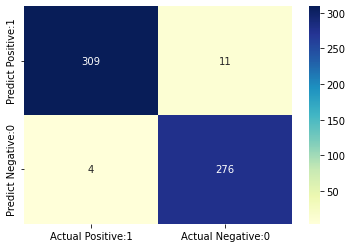

In [29]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       320
           1       0.96      0.99      0.97       280

    accuracy                           0.97       600
   macro avg       0.97      0.98      0.97       600
weighted avg       0.98      0.97      0.98       600



In [31]:
# compute ROC AUC
y_pred1 = gnb.predict_proba(X_test)[:, 1]
ROC_AUC = roc_auc_score(y_test, y_pred1)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9834


# Feature selection

In [32]:
def select_features(X_train, y_train, X_test):
# configure to select all features
    #fs = SelectKBest(score_func=f_classif, k='all')
    fs = SelectKBest(score_func=f_classif, k = 17)
# learn relationship from training data
    fs.fit(X_train, y_train)
# transform train input data
    X_train_fs = fs.transform(X_train)
# transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [33]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

In [34]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 105.285914
Feature 1: 0.294455
Feature 2: 0.138175
Feature 3: 2.720845
Feature 4: 0.000897
Feature 5: 0.794754
Feature 6: 1.859258
Feature 7: 2.329835
Feature 8: 0.772381
Feature 9: 1.460590
Feature 10: 0.202329
Feature 11: 5.591466
Feature 12: 0.974928
Feature 13: 0.364769
Feature 14: 0.040194
Feature 15: 5.334155
Feature 16: 6.166812
Feature 17: 0.002195
Feature 18: 0.848456
Feature 19: 3.210657
Feature 20: 14.443333
Feature 21: 4.486782
Feature 22: 0.000011
Feature 23: 0.102287
Feature 24: 0.975310
Feature 25: 0.004933
Feature 26: 0.063743
Feature 27: 3.030309
Feature 28: 69.065763
Feature 29: 1.607314
Feature 30: 0.075536
Feature 31: 0.894110
Feature 32: 0.000192
Feature 33: 0.036123
Feature 34: 1.482209
Feature 35: 0.398576
Feature 36: 1.700274
Feature 37: 0.342130
Feature 38: 0.410321
Feature 39: 0.211972
Feature 40: 0.125362
Feature 41: 0.001279
Feature 42: 1.187546
Feature 43: 0.394559
Feature 44: 0.266663
Feature 45: 0.000267
Feature 46: 1.270782
Feature 47: 0.25520

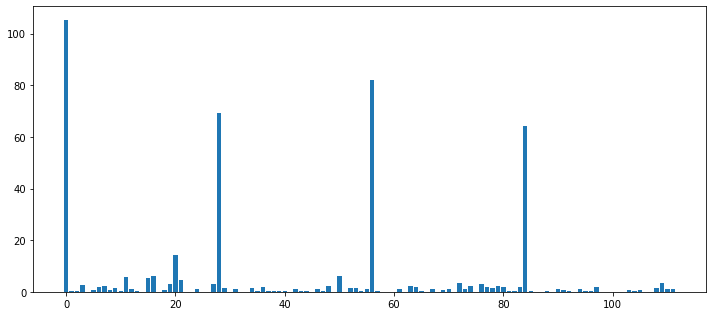

In [35]:
# plot the scores
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10, 4.50]
plt.rcParams["figure.autolayout"] = True
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

# Build a new model with reduced number of features

In [36]:
# train a Support Vector classifier on the training set
svc = SVC()
svc.fit(X_train_fs, y_train)
# predictions train set
y_pred_train = svc.predict(X_train_fs)
print('Training-set accuracy score: {0:0.2f}'. format(accuracy_score(y_train, y_pred_train)))
# predictions test set
y_pred = svc.predict(X_test_fs)
print('Testing-set accuracy score: {0:0.2f}'. format(accuracy_score(y_test, y_pred)))
print("F1: {0:0.2f}". format(f1_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Training-set accuracy score: 0.99
Testing-set accuracy score: 0.95
F1: 0.95
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       320
           1       0.93      0.96      0.95       280

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



In [37]:
X_train_fs.shape

(1400, 17)

# UMAP

In [38]:
# Now apply the UMAP transformation
# Supervised UMAP transformation on the training set with reduced features
manifold = umap.UMAP(n_neighbors = 14, min_dist = 0.1, n_components = 2, metric = "manhattan").fit(X_train_fs, y_train)
X_reduced = manifold.transform(X_train_fs)

In [39]:
# Fit a model with UMAP transformation applied
svc = SVC().fit(X_reduced, y_train)
svc.score(X_reduced, y_train)

1.0

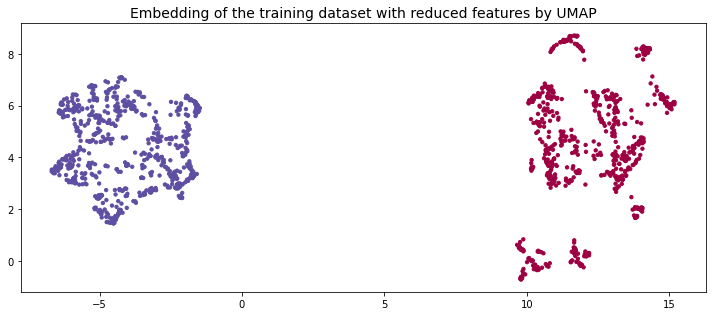

In [40]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = y_train, s = 11, cmap = 'Spectral');
plt.title('Embedding of the training dataset with reduced features by UMAP', fontsize = 14);

# Predictions on the test with UMAP and with reduced features as predictors

In [41]:
X_reduced = manifold.transform(X_test_fs)
svc.score(X_reduced, y_test)

0.9716666666666667

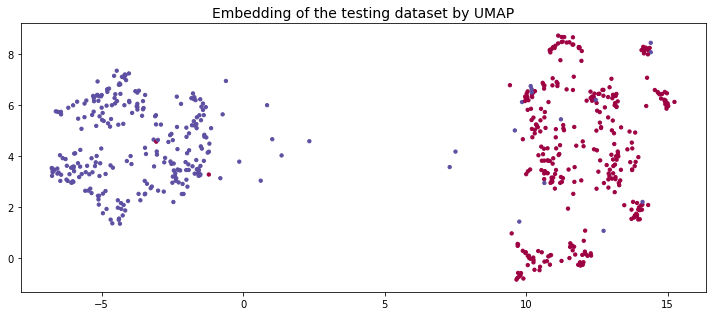

In [42]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = y_test, s = 11, cmap = 'Spectral');
plt.title('Embedding of the testing dataset by UMAP', fontsize = 14);

# Random Forest

In [43]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1821)

In [44]:
# train a Random Forest classifier on the training set
rf.fit(X_train_fs, y_train)
# predictions train set
y_pred_train = rf.predict(X_train_fs)
print('Training-set accuracy score: {0:0.2f}'. format(accuracy_score(y_train, y_pred_train)))
# predictions test set
y_pred = rf.predict(X_test_fs)
print('Testing-set accuracy score: {0:0.2f}'. format(accuracy_score(y_test, y_pred)))
print("F1: {0:0.2f}". format(f1_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Training-set accuracy score: 1.00
Testing-set accuracy score: 0.92
F1: 0.92
              precision    recall  f1-score   support

           0       1.00      0.85      0.92       320
           1       0.86      1.00      0.92       280

    accuracy                           0.92       600
   macro avg       0.93      0.93      0.92       600
weighted avg       0.93      0.92      0.92       600



# XGboost

In [45]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state = 1821, use_label_encoder = False)

In [46]:
# train an XGBoost classifier on the training set
xgb_model.fit(X_train_fs, y_train)
# predictions train set
y_pred_train = xgb_model.predict(X_train_fs)
print('Training-set accuracy score: {0:0.2f}'. format(accuracy_score(y_train, y_pred_train)))
# predictions test set
y_pred = xgb_model.predict(X_test_fs)
print('Testing-set accuracy score: {0:0.2f}'. format(accuracy_score(y_test, y_pred)))
print("F1: {0:0.2f}". format(f1_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

[00:33:23] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training-set accuracy score: 1.00
Testing-set accuracy score: 0.96
F1: 0.96
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       320
           1       0.92      1.00      0.96       280

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



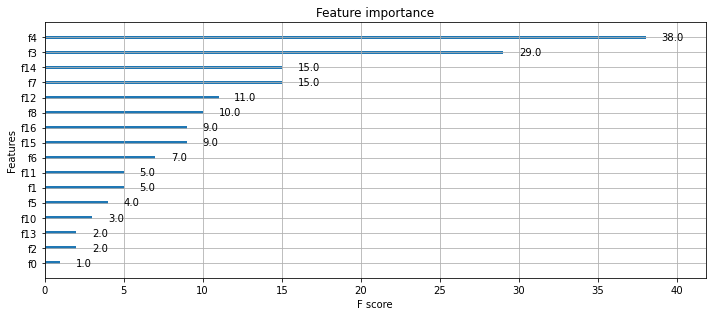

In [47]:
xgb.plot_importance(xgb_model);

# UMAP and XGBoost

In [48]:
# Now apply the UMAP transformation
# Supervised UMAP transformation on the training set with reduced features
manifold = umap.UMAP(n_neighbors = 14, min_dist = 0.1, n_components = 2, metric = "manhattan").fit(X_train_fs, y_train)
X_reduced = manifold.transform(X_train_fs)

In [49]:
# Train an XGBOost model with UMAP transformation applied and with reduced features
xgb_model.fit(X_reduced, y_train)
# predictions train set
y_pred_train = xgb_model.predict(X_reduced)
print('Training-set accuracy score: {0:0.2f}'. format(accuracy_score(y_train, y_pred_train)))
# predictions test set
y_pred = xgb_model.predict(manifold.transform(X_test_fs))
print('Testing-set accuracy score: {0:0.2f}'. format(accuracy_score(y_test, y_pred)))
print("F1: {0:0.2f}". format(f1_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

[00:33:28] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training-set accuracy score: 1.00
Testing-set accuracy score: 0.97
F1: 0.97
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       320
           1       0.99      0.95      0.97       280

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



In [50]:
X_train_fs.shape

(1400, 17)

# Validation set

In [51]:
shock_4 = pd.read_csv("shock_4.csv", header = None)

In [52]:
shock_4.columns = header_list
shock_4.columns

Index(['V0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       ...
       'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111',
       'V112'],
      dtype='object', length=113)

In [53]:
X_test, y_test = shock_4.drop("V112", axis=1), shock_4[["V112"]].values.flatten()
print('X:', X.shape)
print('y:', y.shape)

X: (2000, 112)
y: (2000,)


In [54]:
X_test = fs.transform(X_test)

In [55]:
# feature scaling
# cols = X_test.columns
pipe = make_pipeline(RobustScaler(),QuantileTransformer())
X_test =  pipe.fit_transform(X_test.copy())
# X_test = pd.DataFrame(X_test, columns=cols)

c:\users\izzyd\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (800). n_quantiles is set to n_samples.
  warnings.warn(


In [56]:
# predictions test set with umap and reduced features
X_reduced = manifold.transform(X_test)
y_pred = xgb_model.predict(X_reduced)
print('Testing-set accuracy score: {0:0.2f}'. format(accuracy_score(y_test, y_pred)))
print("F1: {0:0.2f}". format(f1_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Testing-set accuracy score: 0.75
F1: 0.15
              precision    recall  f1-score   support

           0       0.99      0.75      0.86       779
           1       0.08      0.86      0.15        21

    accuracy                           0.75       800
   macro avg       0.54      0.80      0.50       800
weighted avg       0.97      0.75      0.84       800



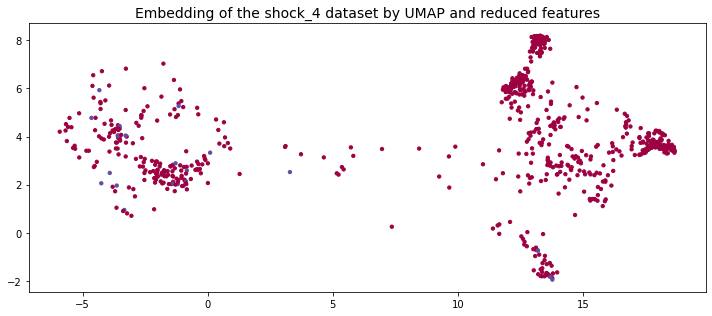

In [57]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = y_test, s = 11, cmap = 'Spectral');
plt.title('Embedding of the shock_4 dataset by UMAP and reduced features', fontsize=14);

# Build an XGBoost model without umap and only with reduced features 

In [58]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state = 1821, use_label_encoder = False)

In [59]:
xgb_model.fit(X_train_fs, y_train)
y_pred = xgb_model.predict(X_test)
print('Testing-set accuracy score: {0:0.2f}'. format(accuracy_score(y_test, y_pred)))
print("F1: {0:0.2f}". format(f1_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

[00:33:37] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Testing-set accuracy score: 0.52
F1: 0.10
              precision    recall  f1-score   support

           0       1.00      0.50      0.67       779
           1       0.05      1.00      0.10        21

    accuracy                           0.52       800
   macro avg       0.53      0.75      0.38       800
weighted avg       0.98      0.51      0.65       800



In [60]:
X_train_fs.shape

(1400, 17)

# Build an XGBoost model without umap and without reduced features

In [61]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state = 1821, use_label_encoder = False)

In [62]:
X_test, y_test = shock_4.drop("V112", axis=1), shock_4[["V112"]].values.flatten()
pipe = make_pipeline(RobustScaler(),QuantileTransformer())
X_test =  pipe.fit_transform(X_test.copy())

c:\users\izzyd\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (800). n_quantiles is set to n_samples.
  warnings.warn(


In [63]:
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print('Testing-set accuracy score: {0:0.2f}'. format(accuracy_score(y_test, y_pred)))
print("F1: {0:0.2f}". format(f1_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

c:\users\izzyd\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:33:37] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Testing-set accuracy score: 0.51
F1: 0.10
              precision    recall  f1-score   support

           0       1.00      0.50      0.67       779
           1       0.05      1.00      0.10        21

    accuracy                           0.51       800
   macro avg       0.53      0.75      0.38       800
weighted avg       0.98      0.51      0.65       800



In [64]:
X_train.shape

(1400, 112)